In [1]:
from collections import defaultdict
import numpy as np
from itertools import product
from scipy.special import gamma
from scipy.spatial.distance import pdist, squareform, euclidean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
from sklearn.linear_model import LinearRegression
from functions_for_clustering import *

In [2]:
df = pd.read_csv('data/part_0.csv')
df.head(-1)

,Ticker,index,Date,extremum,-1,-2,-3,-4,-5,-6,...,-275,-276,-277,-278,-279,-280,-281,-282,-283,-284
0,000001.SS,243.0,2021-02-19,1.0,0.979912,0.960347,0.910541,0.841968,0.807106,0.812443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000002.SS,242.0,2021-02-19,1.0,0.979962,0.960403,0.910585,0.842046,0.807224,0.812541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000019.SZ,45.0,2020-04-24,1.0,0.819562,0.655986,0.507589,0.372681,0.246206,0.229342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000020.SZ,95.0,2020-07-10,1.0,0.835148,0.807154,0.720062,0.665630,0.606532,0.552100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000020.SZ,238.0,2021-02-05,0.0,0.018663,0.041991,0.041991,0.041991,0.068429,0.125972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,1K2.BE,178.0,2020-11-02,0.0,0.229788,0.275362,0.273881,0.271602,0.270805,0.272628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11146,1K4.F,86.0,2020-06-25,0.0,0.003555,0.003555,0.024882,0.046209,0.167064,0.167064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11147,1K5.F,156.0,2020-10-01,0.0,0.053628,0.053628,0.053628,0.066021,0.008562,0.014196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11148,1K5.F,289.0,2021-04-14,1.0,0.954935,0.909869,0.954935,0.833258,0.842271,0.837765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#extracting data
df_temp = df.drop(labels=['Ticker', 'index', 'Date', 'extremum'], axis=1)

key1 = -15
key2 = min([int(x) for x in df_temp.columns])

df_temp = df_temp.drop(labels=[str(x) for x in list(range(key2,key1))], axis=1)
df_temp = df_temp.loc[df_temp.index < 4000]
df_temp = df_temp.dropna(axis=0)

clustering_data_trended = df_temp.values.tolist()
clustering_data = detrend(clustering_data_trended)
len(clustering_data)

3906

In [4]:
#creating z-functions for everything
from functions_for_clustering import *
clustering_data_z_optimized = []
for i in clustering_data:
    clustering_data_z_optimized.append(generate_z_vector_best(i,(key1//-3)))
len(clustering_data_z_optimized)

3906

In [5]:
clustering_result = get_clustering(clustering_data_z_optimized, 2, 1)
len(clustering_result)

C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:89: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:18: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))


3906

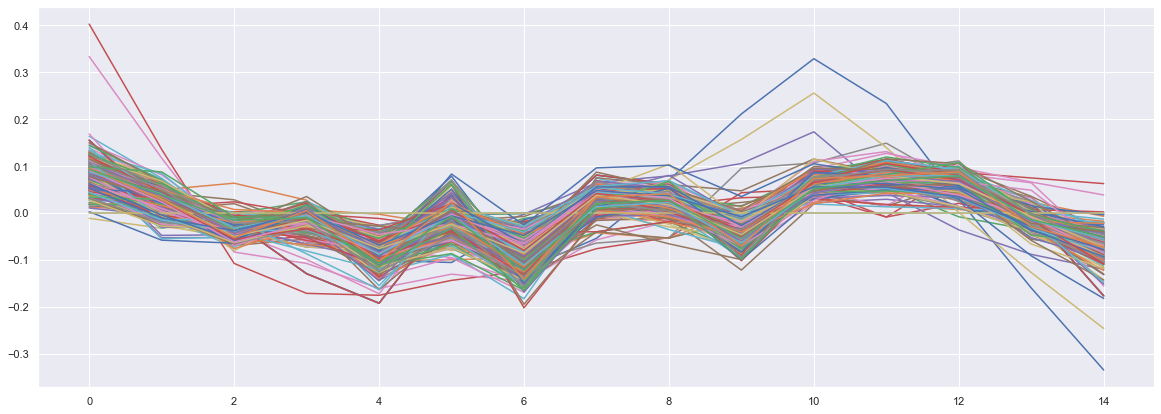

In [6]:
sns.set(rc={'figure.figsize':(20,7)})

visualization_data = []
for i in range(len(clustering_result)):
    if clustering_result[i] == max(set(clustering_result), key=list(clustering_result).count):
        visualization_data.append(clustering_data[i])
        
visualization_index = list(range(len(clustering_data[0])))
for i in visualization_data:
    sns.lineplot(y=i, x=visualization_index)

<AxesSubplot:>

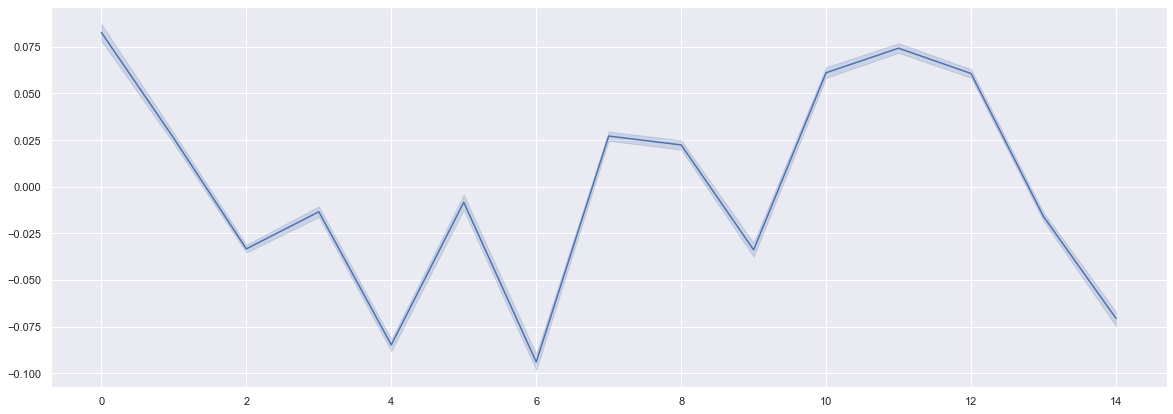

In [10]:
visualization_data_temp = []
for i in range(len(clustering_result)):
    if clustering_result[i] == max(set(clustering_result), key=list(clustering_result).count):
        visualization_data_temp.append(clustering_data[i])

visualization_data = np.array(visualization_data_temp).flatten()        
visualization_index = np.array(list(range(len(clustering_data[0])))*len(visualization_data_temp)).flatten()


sns.lineplot(y=visualization_data, x=visualization_index)

<AxesSubplot:>

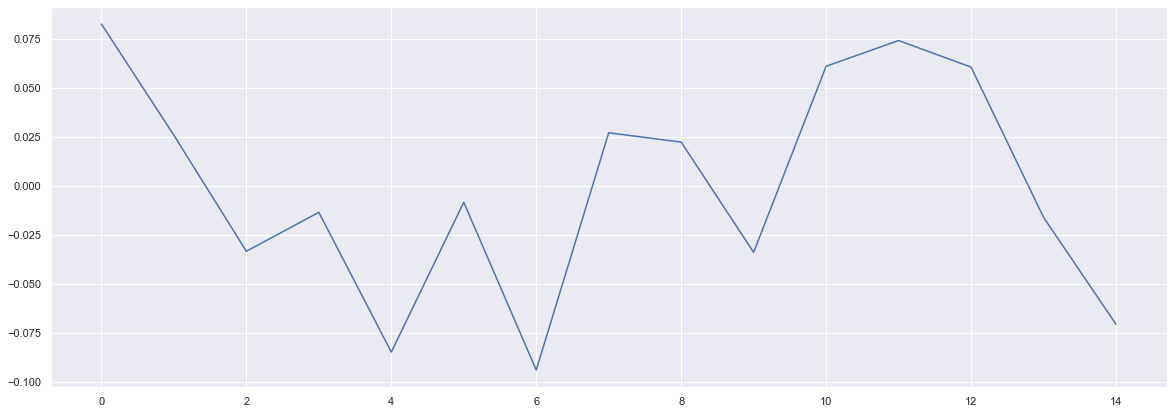

In [11]:
visualization_data = []
for i in range(len(clustering_result)):
    if clustering_result[i] == max(set(clustering_result), key=list(clustering_result).count):
        visualization_data.append(clustering_data[i])
        
visualization_index = list(range(len(clustering_data[0])))
    
motif = generate_motif(visualization_data)

sns.lineplot(y=motif, x=visualization_index)